#### Phan Nguyễn Khôi Nguyên - 21068021

## Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Creating features
* Load data vào sales_df
* Create x, an array of the values from the sales_df DataFrame's "radio" column
* Create y, an array of the values from the sales_df DataFrame's "sales" column
* Reshape x into a two-dimensional NumPy array
* Print the shape of x and y 

In [6]:
# Load data vào sales_df
sales_df = pd.read_csv(r"T:\21068021_PhanNguyenKhoiNguyen_23-3-2024\data\advertising_and_sales_clean.csv")
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [10]:
# Create x, an array of the values from the "radio" column
x = sales_df['radio'].values
#Print x
x

array([ 6566.23,  9237.76, 15886.45, ..., 19800.07, 17534.64, 15966.69])

In [11]:
# Create y, an array of the values from the "sales" column
y = sales_df['sales'].values
# Print y
y

array([ 54732.76,  46677.9 , 150177.83, ..., 163631.46, 253610.41,
       148202.41])

In [12]:
# Reshape x into a two-dimensional NumPy array
x = x.reshape(-1, 1)
# print x
x

array([[ 6566.23],
       [ 9237.76],
       [15886.45],
       ...,
       [19800.07],
       [17534.64],
       [15966.69]])

In [13]:
# Print the shape of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4546, 1)
Shape of y: (4546,)


## 2. Building a linear regressio model 
* Import LinearRegression
* Instantiate a linear regression model
* Predict sales values using x, storing as predictions

In [14]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [18]:
# Instantiate a linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(x, y)

# Predict sales values using x, storing as predictions
predictions = model.predict(x)
print(predictions)

[ 95491.17119147 117829.51038393 173423.38071499 ... 206147.61403088
 187204.93183873 174094.31771993]


## 3. Visualizing a linear regression model
* Import matplotlib.pyplot as plt
* Create a scatter plot visualizing y against x, with observations in blue
* Draw a red line plot displaying the predictions against x
* Display the plot

In [19]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

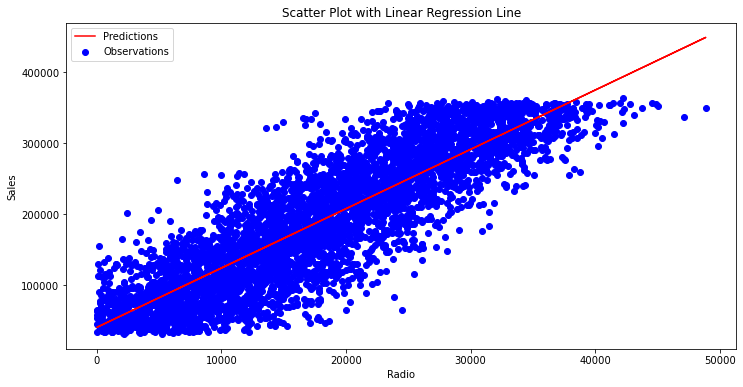

In [21]:
plt.figure(figsize=(12,6))
# Create a scatter plot visualizing y against x, with observations in blue
plt.scatter(x, y, color='blue', label='Observations')

# Draw a red line plot displaying the predictions against x
plt.plot(x, predictions, color='red', label='Predictions')

# Add labels and title
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot with Linear Regression Line')

# Add legend
plt.legend()

# Display the plot
plt.show()

## 4. Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset
* Create x. an array containing values of all features in sales_df, and y, containing all values from the 'sales' column
* Instantiate a linear regression model
* Fit the model to the training data (70% for train)
* Create y pred, making predictions for sales using the test features

In [29]:
from sklearn.model_selection import train_test_split

#Create x (an array containing values of all features in sales_df)
# X = sales_df.drop(columns=['influencer'])
X = sales_df.drop(columns=['sales', 'influencer'])

# Create y containing all values from column 'sales'
y = sales_df['sales'].values  

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Create y pred, Making predictions for sales using the test features
y_pred = model.predict(X_test)
print(y_pred)

[ 53176.66154234  70996.19873235 267032.64132081 ...  53186.97417758
 124484.96692389 138713.21477866]


## 5. Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.
* Import mean_squared_error
* Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
* Calculate the model's root mean squared error using y_test and y_pred.
* Print r_squared and rmse

In [30]:
#Import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
# Calculate R-squared score by passing the test feature values and the test target values to an appropriate method.
r_squared = model.score(X_test, y_test)

In [32]:
# Calculate the model's root mean squared error using y_test and y_pred.
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [33]:
# Print R-squared and RMSE
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.9990152104759368
Root Mean Squared Error (RMSE): 2944.4331996000956


## 6.Cross-Validation for R-squared
Cross-Validation is a vital approach to evaluating a model.It maximizes the amount od data that is available to the model, as the model is not only trained but also tested on all of the availabel data.
* import KFold and cross_val_score
* Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5
* Perform cross-validation using reg on x and y, passing kf to cv
* Print the cv_scores

In [35]:
# Import KFold and cross_val_score
from sklearn.model_selection import KFold, cross_val_score

In [36]:
# Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5
kf = KFold(n_splits=6, shuffle=True, random_state=5)

In [40]:
# Perform cross-validation using reg on X and y, passing kf to cv
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=kf)

In [41]:
# Print the cv_scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


## 7. Analyzing cross-validation metrics 
Now you have performed cross-validation, it's time to analyze the results.
You will display the mean, standard deviation , and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.
* Calculate and print the mean of the results
* Calculate and print the standard deviation of cv_results
* Display the 95% confidence interval for your results using np.quantile().

In [44]:
# Calculate and print the mean of the results
mean_cv_score = np.mean(cv_scores)
print("Mean of the cv_scores:", mean_cv_score)

Kết quả trung bình cross-validation scores: 0.9989896443678249


In [52]:
# Calculate and print the standard deviation of cv_results
std_cv_score = np.std(cv_scores)
print("Standard deviation of cv_scores: ", std_cv_score)

Standard deviation of cv_scores:  6.608118371529651e-05


In [46]:
# Display the 95% confidence interval for your results using np.quantile().
confidence_interval = np.quantile(cv_scores, [0.025, 0.975])
print("95% Confidence interval:", confidence_interval)

95% Confidence interval: [0.99889767 0.99908583]


## 8. Regularized regression: Ridge
Ridge regression performs regulazition by computing the squared values of the model parameters multiplied by alpla and adding them to the loss function
In this exercise, you will fit ridge regression models over a range of different alpla values, and print there R^2 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into x_train, X_test, y_train, y_test for you
alplas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
* Import Ridge
* Instantiate Ridge, setting alpla equal to alpla
* Fit the model to training data.
* Calculate the R^2 score for each iteration of ridge

In [49]:
# Import Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [51]:
# Define a list of alpha values
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

# Iterate over each alpha value
for alpha in alphas:
    # Instantiate Ridge, setting alpla equal to alpla
    ridge_model = Ridge(alpha=alpha)
    
    # Fit the model to training data
    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test) # Make predictions on the test set
    
    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    
    # Print the alpha value and corresponding R^2 score
    print(f"Alpha: {alpha}, R^2 Score: {r2}")

Alpha: 0.1, R^2 Score: 0.9990152104759369
Alpha: 1.0, R^2 Score: 0.9990152104759373
Alpha: 10.0, R^2 Score: 0.9990152104759419
Alpha: 100.0, R^2 Score: 0.9990152104759871
Alpha: 1000.0, R^2 Score: 0.9990152104764387
Alpha: 10000.0, R^2 Score: 0.9990152104809561


## 9. Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.
In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficient
* Import lasso from sklearn.linear_model
* Instantiate a lasso regressor with an alpha of 0.3
* Fit the model to the data
* Compute the model's coefficients, storing as lasso_coef

In [63]:
#Import lasso from sklearn.linear_model
from sklearn.linear_model import Lasso

# Instantiate a Lasso regressor with an alpha of 0.3
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute the model's coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ 3.56256962 -0.00397035  0.00496385]


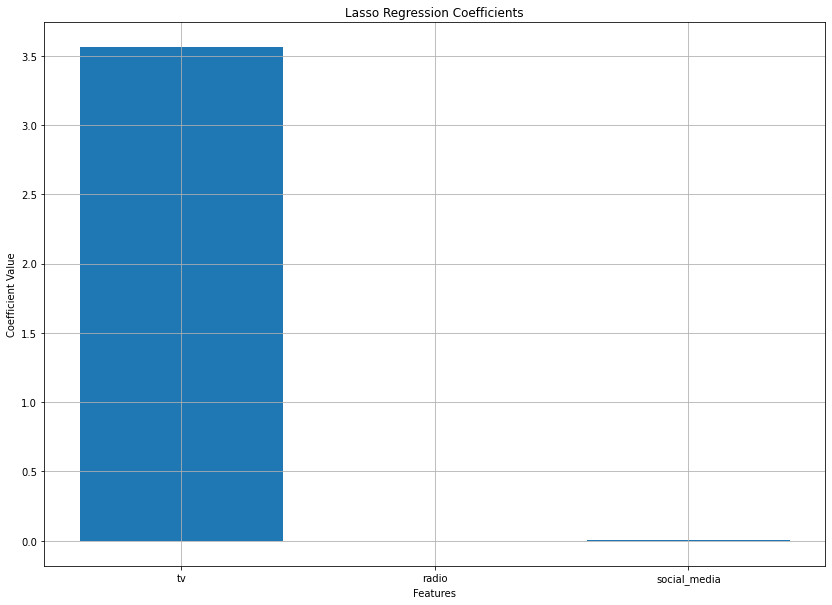

In [62]:
# Plot the coefficients as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.bar(X.columns, lasso_coef)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.grid(True)
plt.show()